# Model Analysis
using the data with all the features

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [75]:
df = pd.read_csv('data_all_F.csv').drop('Unnamed: 0', axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 31 columns):
Date                       362 non-null object
company                    362 non-null object
current_price              362 non-null float64
momentum                   362 non-null float64
moving_average             362 non-null float64
moving_volatility          362 non-null float64
trading_range              362 non-null float64
target_return              362 non-null float64
exp_market_change          362 non-null float64
rates                      362 non-null float64
Revenue                    362 non-null float64
Cost_of_Sales              362 non-null float64
Gross_profit               362 non-null float64
Operating_profit           362 non-null float64
Net_Profit                 362 non-null float64
Issue_of_shares            362 non-null float64
Share_repurchase           362 non-null float64
Non_current_assets         362 non-null float64
Current_assets             362 no

### Features/Labels split

In [77]:
# Lables
y = df['target_return']

# Features
X = df.drop(['Date', 'company', 'target_return'], axis=1)

### Rescaling features

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
X_scaled = scaler.fit_transform(X)

In [81]:
X_standardize = pd.DataFrame(X_scaled,columns=X.columns)
X_standardize.head()

,current_price,momentum,moving_average,moving_volatility,trading_range,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,...,net_cash_op_act,Debt_M,Debt_perc_GDP,Debt_Per_Capita,CPI_perc,GDP_Mill_dollars,GDP_Growth_perc,Unemployment_alt,Brent_Oil,Gold
0,0.571183,-1.191752,0.665252,1.008415,0.816413,-0.752487,1.614377,-0.258862,-0.247648,-0.276560,...,-0.195021,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907,-0.868312,-1.692901
1,0.646429,0.771303,0.577312,0.295273,0.519675,0.497042,0.922660,-0.259293,-0.247743,-0.277666,...,-0.196623,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907,-0.827976,-1.447566
2,0.658742,-0.575385,0.716630,0.579326,0.844317,-0.240694,0.701310,-0.258698,-0.247720,-0.275918,...,-0.194535,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907,-0.965498,-1.612280
3,0.821409,0.422697,0.738470,0.023668,0.535077,2.370180,-0.363935,-0.258394,-0.247383,-0.275685,...,-0.193934,-2.320115,-1.596218,-1.896766,0.001992,0.377860,1.004574,-0.913907,-0.773607,-1.311821
4,0.741284,-0.419215,0.751188,0.345387,0.388110,1.155783,-0.529947,-0.258221,-0.247169,-0.275599,...,-0.193499,0.357897,-0.966469,0.850759,-1.699192,1.431649,1.319792,-0.913907,-0.722536,-1.211743


### Train/Test split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=101)

### Training

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

In [85]:
lm = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.001)
enet = ElasticNet(alpha=0.001,l1_ratio=0.8)
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.0000001 )
svr_lin = SVR(kernel='linear', gamma=0.0000001, C=1)
svr_poly = SVR(kernel='poly', C=1, gamma=0.0000001, degree=3)

In [86]:
svr_rbf.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
svr_lin.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
svr_poly.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_,enet.intercept_,svr_rbf.intercept_,svr_lin.intercept_,svr_poly.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso','ElasticNet','svr_rbf','svr_lin','svr_poly'])

,Intercept
Linear,0.025631
Ridge,0.023667
Lasso,0.025577
ElasticNet,0.025178
svr_rbf,0.026198
svr_lin,0.023907
svr_poly,0.026107


In [94]:
# Create dataframe for coefficents of linear model
lm_coef = pd.DataFrame(lm.coef_,index=X.columns,columns=['Linear'])

# Create dataframe for coefficents of ridge model
ridge_coef = pd.DataFrame(ridge.coef_,index=X.columns,columns=['Ridge'])

# Create dataframe for coefficents of lasso model
lasso_coef = pd.DataFrame(lasso.coef_,index=X.columns,columns=['Lasso'])

# Create dataframe for coefficents of ElasticNet model
enet_coef = pd.DataFrame(enet.coef_,index=X.columns,columns=['ElasticNet'])

# Create dataframe for coefficents of SVR models
#svr_lin_coef = pd.DataFrame(svr_lin.coef_,index=X.columns,columns=['svr_lin'])
#svr_rbf_coef = pd.DataFrame(svr_rbf.coef_,index=X.columns,columns=['svr_rbf'])
#svr_poly_coef = pd.DataFrame(svr_poly.coef_,index=X.columns,columns=['svr_poly'])

# Put dataframes together
coefs = pd.concat([lm_coef, ridge_coef, lasso_coef,enet_coef], axis=1)
coefs

,Linear,Ridge,Lasso,ElasticNet
current_price,-0.173574,-0.032215,-0.006830,-0.007965
momentum,0.012863,0.005182,0.003588,0.003814
moving_average,0.162756,0.022383,-0.000000,-0.000000
moving_volatility,0.030609,0.022879,0.014218,0.015595
trading_range,-0.013323,-0.005943,-0.000000,-0.000000
exp_market_change,-0.035254,-0.033173,-0.026853,-0.027740
rates,-0.127628,-0.059727,-0.040086,-0.041456
Revenue,11.746539,-0.009294,-0.000000,-0.000000
Cost_of_Sales,-8.008796,-0.022337,-0.000000,-0.000000
Gross_profit,-3.835579,0.014967,-0.000000,-0.000000


In [95]:
# Bar chart showing effects of L1 and L2 Regularization
#coefs[['Ridge','Lasso','ElasticNet']].plot(kind='bar', figsize=(15,5))

### Testing

In [96]:
from sklearn import metrics

In [97]:
# Get predictions for training data
fit_lm = lm.predict(X_train)
fit_ridge = ridge.predict(X_train)
fit_lasso = lasso.predict(X_train)
fit_enet = enet.predict(X_train)
fit_svr_rbf = svr_rbf.predict(X_train)
fit_svr_lin = svr_lin.predict(X_train)
fit_svr_poly = svr_poly.predict(X_train)

In [98]:
# Print MSE for models
print('MSE (train)')
print('Linear:     ', metrics.mean_squared_error(y_train, fit_lm))
print('Ridge:      ', metrics.mean_squared_error(y_train, fit_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_train, fit_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_train, fit_enet))
print('SVR_rbf:    ', metrics.mean_squared_error(y_train, fit_svr_rbf)) 
print('SVR_lin:    ', metrics.mean_squared_error(y_train, fit_svr_lin)) 
print('SVR_poly:   ', metrics.mean_squared_error(y_train, fit_svr_poly))

MSE (train)
Linear:      0.01327986725951413
Ridge:       0.014136847317852695
Lasso:       0.014544108501914609
ElasticNet:  0.014472560831597862
SVR_rbf:     0.01625899042620694
SVR_lin:     0.014329328295032265
SVR_poly:    0.01625950182338733


In [99]:
print('MSE (train)')
print('Linear:     ', lm.score(X_train, y_train))
print('Ridge:      ', ridge.score(X_train, y_train))
print('Lasso:      ', lasso.score(X_train, y_train))
print('ElasticNet: ', enet.score(X_train, y_train))
print('SVR_rbf:    ', svr_rbf.score(X_train, y_train))
print('SVR_lin:    ', svr_lin.score(X_train, y_train)) 
print('SVR_poly:   ', svr_poly.score(X_train, y_train))

MSE (train)
Linear:      0.18325361494876324
Ridge:       0.1305471118617263
Lasso:       0.10549948952077659
ElasticNet:  0.10989985738199703
SVR_rbf:     2.9789780215061512e-05
SVR_lin:     0.11870903101118813
SVR_poly:    -1.6624768179873683e-06


In [100]:
# r2_score(y_true, y_pred
print('R-SQUARED SCORES')
print('Linear:     ', metrics.r2_score(y_train, lm.predict(X_train)))
print('Ridge:      ', metrics.r2_score(y_train, ridge.predict(X_train)))
print('Lasso:      ', metrics.r2_score(y_train, lasso.predict(X_train)))
print('ElasticNet: ', metrics.r2_score(y_train, enet.predict(X_train)))
print('svr_lin:    ', metrics.r2_score(y_train, svr_lin.predict(X_train)))

R-SQUARED SCORES
Linear:      0.18325361494876324
Ridge:       0.1305471118617263
Lasso:       0.10549948952077659
ElasticNet:  0.10989985738199703
svr_lin:     0.11870903101118813


In [101]:
def adj_r2_score(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.coef_)-1)
    return adj

In [102]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_train, lm.predict(X_train)))
print('Ridge:      ', adj_r2_score(ridge, y_train, ridge.predict(X_train)))
print('Lasso:     ', adj_r2_score(lasso, y_train, lasso.predict(X_train)))
print('ElasticNet:', adj_r2_score(enet, y_train, enet.predict(X_train)))
print('svr_lin:    ', adj_r2_score(svr_lin, y_train, svr_lin.predict(X_train)))

Adjusted R-SQUARED SCORES
Linear:      0.08116031681735869
Ridge:       0.021865500844442165
Lasso:      -0.006313074289126197
ElasticNet: -0.0013626604452532387
svr_lin:     0.11519791161282633


---
### Predicting

In [103]:
pred_lm = lm.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_enet = enet.predict(X_test)
pred_svr_rbf = svr_rbf.predict(X_test) 
pred_svr_lin = svr_lin.predict(X_test)
pred_svr_poly = svr_poly.predict(X_test)

### Testing

Firstly we plot the actual returns vs. the predictions by our models.

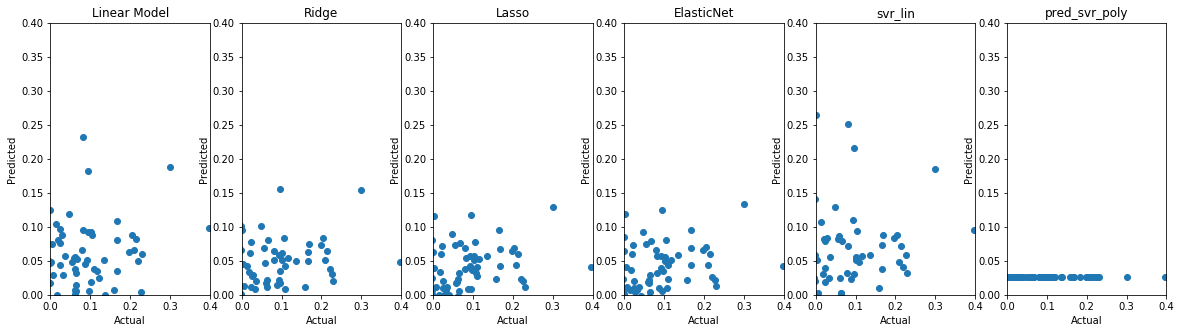

In [104]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=6)

# Create list of titles and predictions to use in for loop
pred = [pred_lm, pred_ridge, pred_lasso, pred_enet,pred_svr_lin,pred_svr_poly]
title = ['Linear Model', 'Ridge', 'Lasso', 'ElasticNet','svr_lin','pred_svr_poly']

# Loop through all axes to plot each model's results 
for i in range(6):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 0.4)
    ax[i].set_ylim(0, 0.4)
    ax[i].scatter(y_test,pred[i]) 

Secondly we calculate the MSE for each model on our testing set. 

In [105]:
print('MSE:')
print('Linear:     ', metrics.mean_squared_error(y_test, pred_lm))
print('Ridge:      ', metrics.mean_squared_error(y_test, pred_ridge))
print('Lasso:      ', metrics.mean_squared_error(y_test, pred_lasso))
print('ElasticNet: ', metrics.mean_squared_error(y_test, pred_enet))
print('SVR_rbf:    ', metrics.mean_squared_error(y_test, pred_svr_rbf)) 
print('SVR_lin:    ', metrics.mean_squared_error(y_test, pred_svr_lin)) 
print('SVR_poly:   ', metrics.mean_squared_error(y_test, pred_svr_poly))

MSE:
Linear:      0.025352709490007192
Ridge:       0.016104094449690708
Lasso:       0.013834331665796
ElasticNet:  0.014019389238475424
SVR_rbf:     0.01566647972081681
SVR_lin:     0.025270444829899034
SVR_poly:    0.015667259026511313


In [106]:
print('Adjusted R-SQUARED SCORES')
print('Linear:     ', adj_r2_score(lm, y_test, lm.predict(X_test)))
print('Ridge:      ', adj_r2_score(ridge, y_test, ridge.predict(X_test)))
print('Lasso:      ', adj_r2_score(lasso, y_test, lasso.predict(X_test)))
print('ElasticNet: ', adj_r2_score(enet, y_test, enet.predict(X_test)))
print('svr_lin: ', adj_r2_score(svr_lin, y_test, svr_lin.predict(X_test)))

Adjusted R-SQUARED SCORES
Linear:      -1.1911761246217867
Ridge:       -0.39183968801144875
Lasso:       -0.19566933302097111
ElasticNet:  -0.21166343160421897
svr_lin:  -0.6329466766755347
